<div dir="rtl">

---

### 📚 آماده‌سازی محیط با وارد کردن کتابخانه‌های مورد نیاز

برای انجام کل مراحل تحلیل، ابتدا باید ابزارهای زیر را بارگذاری کنیم:

#### 📦 کتابخانه‌های پایه برای پردازش داده  
- `import pandas as pd`  
  خواندن فایل‌های CSV و کار با جدول‌های داده‌ای (DataFrame).  
- `import numpy as np`  
  انجام محاسبات عددی و کار با آرایه‌ها (arrays).

#### 📊 کتابخانه‌های مصورسازی و تحلیل بصری  
- `import matplotlib.pyplot as plt`  
  رسم نمودارهای پایه (میله‌ای، خطی، پراکندگی و …).  
- `import seaborn as sns`  
  نمودارهای آماری پیشرفته‌تر و زیباتر.

#### 🧹 کتابخانه‌های پیش‌پردازش و تقسیم داده  
- `train_test_split`  
  جدا کردن داده‌ها به مجموعه‌های آموزش و تست.  
- `cross_val_score`  
  اجرای اعتبارسنجی متقابل (Cross Validation).  
- `KFold`  
  تعیین تعداد بخش‌ها (fold) برای اعتبارسنجی.  
- `LabelEncoder`  
  تبدیل ستون‌های متنی (مثل «Male»/«Female») به مقادیر عددی.

#### 🧠 مدل‌سازی یادگیری ماشین  
- `RandomForestRegressor`  
  پیاده‌سازی الگوریتم جنگل تصادفی برای مسئله‌ی رگرسیون (پیش‌بینی مقدار عددی).

#### 📏 معیارهای ارزیابی مدل  
- `mean_absolute_error`  
  محاسبه‌ی میانگین خطای مطلق (MAE) بین پیش‌بینی و مقدار واقعی.  
- `r2_score`  
  محاسبه‌ی ضریب تعیین (R²) برای سنجش دقت مدل.

#### 📐 تحلیل آماری مدل  
- `import statsmodels.api as sm`  
  ارائه‌ی خلاصه‌ی آماری کامل (ضریب‌ها، p-value، خطای استاندارد و …) با روش OLS.

In [2]:
# 📦 Basic libraries for data processing
import pandas as pd          # For reading CSV files and working with DataFrames
import numpy as np           # For basic numerical computations

# 📊 Libraries for plotting and visual analysis
import matplotlib.pyplot as plt   # For plotting charts (bar, line, scatter, etc.)
import seaborn as sns             # For more advanced and visually appealing plots

# 🧹 Libraries for preprocessing and splitting data
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
from sklearn.model_selection import cross_val_score   # Performing cross-validation
from sklearn.model_selection import KFold              # Defining the number of folds for cross-validation
from sklearn.preprocessing import LabelEncoder         # Converting categorical data to numeric (e.g., Male/Female)

# 🧠 Machine learning modeling library
from sklearn.ensemble import RandomForestRegressor     # Random Forest model for regression

# 📏 Model evaluation metrics
from sklearn.metrics import mean_absolute_error        # Mean Absolute Error (MAE)
from sklearn.metrics import r2_score                   # R² score to evaluate model accuracy

# 📐 Statistical analysis library for regression summary
import statsmodels.api as sm                           # Provides a full statistical summary of the regression model

<div dir="rtl">

---

✨ **بارگذاری داده‌ها با یک فرمان**  
  
✅ فایل `calorie.csv` به‌عنوان یک **DataFrame** خوانده می‌شود و در متغیر `df` ذخیره می‌گردد.  
📋 این DataFrame یک ساختار جدولی منظم است که تمام ردیف‌ها و ستون‌های داده را در خود جای داده و زمینه‌ی مناسبی برای تحلیل، پیش‌پردازش و مدلسازی فراهم می‌آورد.

In [3]:
# 📥 Reading the data file calorie.csv and storing it in a DataFrame named df
df = pd.read_csv('calorie.csv')

<div dir="rtl">

---

### 📌 **نمایش اولیه داده‌ها**

این دستور، 👁 **۵ سطر اول** دیتافریم `df` رو نمایش می‌ده.  
با این کار، می‌تونیم در یک نگاه:

✅ ساختار کلی داده‌ها رو ببینیم  
✅ با نام ستون‌ها آشنا بشیم  
✅ نوع مقادیر (عددی یا متنی) رو بررسی کنیم  
✅ و بفهمیم که آیا داده‌ها کامل و تمیز هستن یا نه  

> 🧠 این قدم برای شروع تحلیل داده‌ها ضروریه!

In [4]:
# 👀 Displaying the first 5 rows of the DataFrame to initially examine the data structure
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


<div dir="rtl">

---

### 🏷️ **نمایش نام ستون‌های دیتافریم**

با این خط کد، لیستی از **تمام ستون‌های موجود** در دیتافریم `df` نمایش داده می‌شه.  
این کار کمک می‌کنه تا:

✅ بفهمیم چه ویژگی‌هایی (Features) در داده‌هامون وجود داره  
✅ بررسی کنیم آیا نام ستون‌ها درست و قابل استفاده در مدل‌سازی هستند یا نه  
✅ و در صورت نیاز، برای بازنام‌گذاری یا انتخاب ویژگی‌ها تصمیم بگیریم

> 🔍 یه قدم ساده ولی کاربردی برای شناخت بهتر ساختار داده‌ها!


In [5]:
# 📋 Displaying the names of all columns in the DataFrame
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

<div dir="rtl">

---

### 🔢 **تعداد سطرها و ستون‌های دیتافریم را نمایش بده**

با این قطعه کد:

📌 اول، با `df.shape` **ابعاد دیتافریم** را دریافت می‌کنیم که شامل دو مقدار است:
- `rows` = تعداد سطرها (نمونه‌ها یا رکوردها)
- `cols` = تعداد ستون‌ها (ویژگی‌ها یا فیلدهای اطلاعاتی)

📌 سپس با دستور `print()` تعداد دقیق **نمونه‌ها** و **ویژگی‌ها** را چاپ می‌کنیم تا بدانیم با چه حجمی از داده طرف هستیم.

> ✅ این کار قدم مهمی در شروع تحلیل داده‌هاست؛ چون به ما کمک می‌کنه ابعاد کلی دیتاست رو بشناسیم.

In [6]:
# 📐 Displaying the number of rows (samples) and columns (features) in the DataFrame
rows, cols = df.shape
print(f"Number of rows: {rows}")     # Number of rows (samples)
print(f"Number of columns: {cols}")  # Number of columns (features)

Number of rows: 973
Number of columns: 15


<div dir="rtl">

---

### 🧾 بررسی نوع داده‌ای ستون‌ها در دیتافریم

در این مرحله، نوع داده‌ای هر ستون بررسی می‌شود تا مشخص کنیم که هر ستون از چه نوع داده‌ای تشکیل شده است:

🔹 **int64** → اعداد صحیح  
مثال: سن (Age)، تعداد دفعات تمرین در هفته (Workout_Frequency)

🔹 **float64** → اعداد اعشاری  
مثال: قد (Height)، درصد چربی بدن (Fat_Percentage)

🔹 **object** → داده‌های متنی  
مثال: جنسیت (Gender)، نوع تمرین (Workout_Type)


💡 **چرا این بررسی مهم است؟**  
زیرا مدل‌های یادگیری ماشین فقط با داده‌های عددی کار می‌کنند. پس ستون‌های متنی باید به داده‌های عددی تبدیل شوند (مثلاً با Label Encoding یا One-Hot Encoding).


In [7]:
# 🧾 Displaying the data type of each column in the DataFrame
df.dtypes

,0
Age,int64
Gender,object
Weight (kg),float64
Height (m),float64
Max_BPM,int64
Avg_BPM,int64
Resting_BPM,int64
Session_Duration (hours),float64
Calories_Burned,float64
Workout_Type,object


<div dir="rtl">

---

### ℹ️ بررسی کلی ساختار دیتافریم

در این مرحله با استفاده از `df.info()` اطلاعات پایه‌ای اما بسیار مهمی درباره دیتافریم دریافت می‌کنیم:

🔸 **نام ستون‌ها**  
🔸 **نوع داده‌ای هر ستون** (مثل عددی یا متنی)  
🔸 **تعداد مقادیر غیرخالی (Non-Null)** در هر ستون  
🔸 **تعداد کل سطرها**  
🔸 **حجم حافظه‌ای که دیتافریم اشغال کرده**


💡 **چرا این مرحله مهم است؟**  
چون به ما دید کلی می‌دهد که:
- آیا ستون‌هایی داریم که مقدارهای گمشده دارند؟
- نوع داده‌ای هر ستون درست تنظیم شده؟
- آیا نیاز به تبدیل یا پاک‌سازی داده‌ها هست یا نه؟

✅ این مرحله پایه‌ای برای تشخیص مشکلات احتمالی در داده‌هاست و قبل از هر گونه پیش‌پردازشی باید انجام شود.


In [8]:
# ℹ️ Displaying general information about the columns, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

<div dir="rtl">

---

### 📊 خلاصه آماری ویژگی‌های عددی

در این بخش با اجرای `df.describe()`، یک نگاه آماری سریع و مفید به تمام ستون‌های عددی دیتافریم می‌ندازیم:


📌 خروجی شامل اطلاعات زیر برای هر ویژگی عددی است:

- **count**: تعداد مقادیر موجود  
- **mean**: میانگین مقادیر  
- **std**: انحراف معیار (میزان پراکندگی داده‌ها)  
- **min**: کمترین مقدار  
- **25%**: چارک اول  
- **50% (median)**: میانه داده‌ها  
- **75%**: چارک سوم  
- **max**: بیشترین مقدار  


💡 **این مرحله به ما کمک می‌کند:**
- داده‌های پرت (outliers) یا غیرعادی را شناسایی کنیم  
- دامنه و مقیاس هر ستون را بشناسیم  
- توزیع داده‌ها را بهتر درک کنیم، مخصوصاً قبل از مدل‌سازی


In [9]:
# 📊 Displaying statistical summary of numerical features (mean, standard deviation, min, max, etc.)
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


<div dir="rtl">

---

### 🔍 بررسی مقادیر گمشده (Missing Values)

در این بخش می‌خوایم مطمئن بشیم هیچ داده‌ای در ستون‌هامون **گم نشده** یا اگر شده، بفهمیم در کجاهاست:


#### ✅ مرحله ۱:  
```python
missing_values = df.isnull().sum()
```
🔹 این خط از کد، تعداد مقادیر گمشده (NaN) در هر ستون را محاسبه می‌کند.


#### ✅ مرحله ۲:  
```python
missing_values[missing_values > 0]
```
🔹 این خط فقط ستون‌هایی را نمایش می‌دهد که **حداقل یک مقدار گمشده** دارند.


💡 **چرا این مرحله مهمه؟**  
چون وجود مقادیر گمشده می‌تونه روی آموزش مدل تأثیر منفی بذاره، و باید یا حذف بشن یا با روش مناسب پر بشن (مانند میانگین، میانه یا مقدار ثابت).


In [10]:
# 🔎 Checking the number of missing values in each column
missing_values = df.isnull().sum()

# 📋 Displaying columns that have at least one missing value
missing_values[missing_values > 0]

,0


<div dir="rtl">

---

### 🔁 تبدیل مقادیر متنی به عددی – ستون جنسیت (Gender)

در این بخش، ستون `Gender` که شامل مقادیر متنی (`Male` و `Female`) است، به مقادیر عددی تبدیل می‌شود تا برای مدل‌سازی قابل استفاده باشد:


#### 🎯 کد:
```python
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
```


🔸 این خط از کد:

- مقدار `'Male'` را به **۰**
- و مقدار `'Female'` را به **۱**

تبدیل می‌کند.


✅ چرا این کار مهم است؟  
مدل‌های یادگیری ماشین با داده‌های عددی بهتر کار می‌کنند، و ستون‌های متنی باید قبل از آموزش مدل به فرم عددی تبدیل شوند.


💡 نکته مهم: این روش به‌صورت مستقیم مقدارها را جایگزین می‌کند و از بروز خطا یا NaN جلوگیری می‌کند.


In [11]:
# 🔁 Converting text values in the 'Gender' column to numeric without creating NaNs: Male → 0, Female → 1
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

<ipython-input-11-05bc2e8d5198>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})


<div dir="rtl">

---

### 🧩 تبدیل ستون متنی به ستون‌های عددی – One-Hot Encoding ستون `Workout_Type`

در این مرحله، ما می‌خواهیم ستون متنی `Workout_Type` (نوع تمرین) را به ستون‌های عددی قابل استفاده در مدل‌های یادگیری ماشین تبدیل کنیم:


#### 🎯 کد:
```python
df = pd.get_dummies(df, columns=['Workout_Type'], drop_first=True, prefix='Workout_Type')
```


🔸 این خط کد چه می‌کند؟

- ستون `Workout_Type` که شامل دسته‌بندی‌هایی مانند `Yoga`, `Cardio`, `Strength` و... است،  
  به چند ستون جدید مثل `Workout_Type_Cardio`, `Workout_Type_Strength` و غیره تقسیم می‌شود.
- گزینه‌ی `drop_first=True` باعث حذف اولین دسته می‌شود (مثلاً `Yoga`)  
  تا از هم‌خطی کامل (Perfect Multicollinearity) بین ستون‌ها جلوگیری شود.
- با `prefix='Workout_Type'` نام ستون‌های جدید واضح و خوانا باقی می‌ماند.


### 🔁 تبدیل ستون‌های بولین (True/False) به عددی (۰/۱)

در برخی موارد، ستون‌هایی با مقادیر `True` و `False` ایجاد می‌شوند. برای استفاده در مدل، آن‌ها را نیز به عدد تبدیل می‌کنیم:

#### 🎯 کد:
```python
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
```


🔸 این بخش:

- ستون‌هایی که نوع داده‌شان `bool` است را پیدا می‌کند.
- سپس آن‌ها را به `int` تبدیل می‌کند:
  - `True` تبدیل به `1`
  - `False` تبدیل به `0`


✅ نتیجه:
تمام داده‌ها اکنون عددی هستند و آماده‌ی استفاده در مدل یادگیری ماشین!

In [12]:
# 🧩 One-hot encode the 'Workout_Type' column into multiple numeric columns
# drop_first=True drops the first category (e.g., Yoga) to avoid perfect multicollinearity
# prefix='Workout_Type' ensures the new column names are clearly labeled
df = pd.get_dummies(df, columns=['Workout_Type'], drop_first=True, prefix='Workout_Type')

# 🔁 Convert any boolean columns (True/False) to numeric (0/1) for compatibility with ML models
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

<div dir="rtl">

---

### 📊 مقایسه ستون‌های قبل و بعد از تبدیل داده‌ها

در این مرحله، بررسی می‌کنیم که **پس از انجام رمزگذاری (Encoding)** چه ستون‌هایی به دیتافریم اضافه یا از آن حذف شده‌اند.


🔍 **توضیح عملکرد کد:**

- ابتدا یک بار دیگر فایل اصلی `calorie.csv` را بارگذاری می‌کنیم تا نام ستون‌های اولیه را بدون تغییر داشته باشیم (`original_columns`).
- سپس نام ستون‌های جدید در دیتافریم پردازش‌شده را استخراج می‌کنیم (`new_columns`).
- با مقایسه این دو لیست:
  - ستون‌هایی که **بعد از رمزگذاری اضافه شده‌اند** (مثلاً ستون‌های One-Hot) در لیست `added` قرار می‌گیرند.
  - ستون‌هایی که **حذف شده‌اند** (مثل ستون متنی `Workout_Type` که تبدیل به چند ستون عددی شده) در لیست `removed` نمایش داده می‌شوند.


✅ **هدف از این بخش:**  
مطمئن شویم که عملیات رمزگذاری و تبدیل داده‌ها به درستی انجام شده و بدانیم کدام ویژگی‌ها تغییر کرده‌اند.

In [13]:
# Save the column names after the initial data load
df_raw = pd.read_csv('calorie.csv')
original_columns = df_raw.columns.tolist()

# Save the column names after encoding
new_columns = df.columns.tolist()

# Compare the two sets of column names
added   = list(set(new_columns) - set(original_columns))   # columns that were added
removed = list(set(original_columns) - set(new_columns))   # columns that were removed

# Print the results
print("✅ Added columns:", sorted(added))
print("❌ Removed columns:", sorted(removed))

✅ Added columns: ['Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga']
❌ Removed columns: ['Workout_Type']


<div dir="rtl">

---

### 👀 نمایش ۷ سطر اول دیتافریم برای بررسی نهایی


🔍 **توضیح عملکرد کد:**

این کد **۷ سطر اول دیتافریم** را نمایش می‌دهد تا بتوانیم:

- ساختار نهایی داده‌ها را ببینیم.
- مطمئن شویم عملیات‌هایی مثل **تبدیل جنسیت، One-Hot Encoding، و حذف مقادیر متنی** به درستی انجام شده‌اند.
- متوجه شویم آیا ستون‌های جدید به‌درستی به دیتافریم اضافه شده‌اند یا نه.

✅ این مرحله به ما یک دید کلی از وضعیت نهایی داده‌ها قبل از شروع مدل‌سازی می‌دهد.

In [14]:
# 👀 Display the first 7 rows of the DataFrame to review the final changes
df.head(7)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,0,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,0,0,1
1,46,1,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,1,0,0
2,32,1,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,0,0,0
3,25,0,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,0,1,0
4,38,0,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,0,1,0
5,56,1,58.0,1.68,168,156,74,1.59,1116.0,15.5,2.7,5,3,20.55,1,0,0
6,36,0,70.3,1.72,174,169,73,1.49,1385.0,21.3,2.3,3,2,23.76,0,0,0


<div dir="rtl">

---

**✂️ تقسیم داده‌ها به آموزش و آزمون:**

- در این مرحله داده‌ها را برای **مدل‌سازی و ارزیابی** آماده می‌کنیم.
- ابتدا با حذف ستون `Calories_Burned`، دیتافریم ویژگی‌ها (X) ساخته می‌شود و سپس همان ستون به‌عنوان **متغیر هدف** (y) نگهداری می‌شود.
- با استفاده از `train_test_split` داده‌ها به دو بخش تقسیم می‌شوند:
  - **۷۰٪ برای آموزش مدل**
  - **۳۰٪ برای تست مدل**
- استفاده از `shuffle=True` باعث می‌شود داده‌ها به‌صورت تصادفی ترکیب شوند و مدل دچار سوگیری نشود.
- عدد `random_state=42` تضمین می‌کند که این تقسیم همیشه یکسان انجام شود (قابل تکرار باشد).


In [15]:
from sklearn.model_selection import train_test_split

# 🎯 Separate features (X) from the target variable (y)
X = df.drop('Calories_Burned', axis=1)  # drop the target column from the DataFrame
y = df['Calories_Burned']               # select only the target variable

# ✂️ Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,        # 30% for the test set
    random_state=42,      # for reproducibility
    shuffle=True          # shuffle the data before splitting
)

<div dir="rtl">

---

### 🧠 اعتبارسنجی مدل جنگل تصادفی با استفاده از Cross Validation:

در این مرحله قصد داریم **مدل جنگل تصادفی (Random Forest Regressor)** را با استفاده از **اعتبارسنجی متقابل پنج‌تایی (5-Fold Cross Validation)** ارزیابی کنیم. این روش باعث می‌شود نتایج مدل **پایدارتر و قابل‌اطمینان‌تر** باشند.

#### مراحل انجام‌شده در کد:

1. **تعریف مدل:**
   - ابتدا یک نمونه از مدل `RandomForestRegressor` ایجاد می‌کنیم با `random_state=42` برای تکرارپذیری نتایج.

2. **ایجاد اعتبارسنجی متقابل:**
   - با استفاده از `KFold` داده‌های آموزش را به ۵ بخش تقسیم می‌کنیم و مدل در هر مرحله روی ۴ بخش آموزش داده شده و روی ۱ بخش اعتبارسنجی می‌شود.

3. **اجرای Cross Validation با معیار MAE:**
   - از معیار **MAE (میانگین خطای قدر مطلق)** برای سنجش دقت مدل استفاده می‌کنیم.
   - چون `cross_val_score` مقدار **منفی MAE** را برمی‌گرداند، علامت منفی آن را برمی‌گردانیم تا مقدار واقعی را به‌دست آوریم.

4. **نمایش نتیجه نهایی:**
   - میانگین خطا در ۵ مرحله اعتبارسنجی نمایش داده می‌شود که معیاری از **دقت کلی مدل** در داده‌های آموزش است.


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

# 🧠 Define the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# ⚙️ Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 🧪 Perform cross-validation using the MAE metric
# (we use 'neg_mean_absolute_error', so we negate the scores to get positive MAE values)
mae_scores = -cross_val_score(
    rf_model,        # the model to evaluate
    X_train,         # training features
    y_train,         # training target
    cv=kf,           # 5-fold CV splitter
    scoring='neg_mean_absolute_error'
)

# 📊 Print the average MAE across the folds
print(f"Mean MAE in Cross Validation: {mae_scores.mean():.2f}")

Mean MAE in Cross Validation: 36.72


<div dir="rtl">

---

### 📝 **تحلیل MAE در مقیاس داده**

در این بخش، برای ارزیابی دقیق‌تر عملکرد مدل، مقدار **میانگین خطای مطلق (MAE)** حاصل از اعتبارسنجی متقابل را نسبت به ویژگی‌های آماری متغیر هدف یعنی `Calories_Burned` بررسی می‌کنیم.

ابتدا آماره‌های پایه شامل **کمترین مقدار**، **بیشترین مقدار**، **میانگین** و **انحراف معیار** کالری‌های سوزانده‌شده را محاسبه می‌کنیم. سپس نسبت MAE به میانگین کالری را به‌صورت درصدی محاسبه می‌کنیم.

اگر این نسبت کمتر از ۵٪ باشد، نشان می‌دهد که مدل ما با دقت بالایی قادر به پیش‌بینی کالری مصرفی است. در این تمرین، این نسبت حدود **۴٪** به دست آمد که دلالت بر **عملکرد قوی و قابل اطمینان مدل** دارد.

In [17]:
# 📊 Evaluating MAE in the context of calorie distribution

# Calculate basic statistics of the target variable (Calories_Burned)
min_cal = y.min()
max_cal = y.max()
mean_cal = y.mean()
std_cal = y.std()

# Display basic stats
print(f"Minimum Calories: {min_cal}")
print(f"Maximum Calories: {max_cal}")
print(f"Mean Calories: {mean_cal:.2f}")
print(f"Standard Deviation: {std_cal:.2f}")

# 📉 Calculate the ratio of MAE to the mean calorie value
cross_val_mae = mae_scores.mean()
mae_ratio = (cross_val_mae / mean_cal) * 100

print(f"\n✅ MAE from Cross Validation: {cross_val_mae:.2f}")
print(f"📐 MAE as % of Mean Calories: {mae_ratio:.2f}%")

# 💬 Interpret the result
if mae_ratio < 5:
    print("\n🔍 MAE is less than 5% of the mean calorie value, indicating high prediction accuracy.")
else:
    print("\n⚠️ MAE is relatively large compared to the mean. Consider further model tuning.")

Minimum Calories: 303.0
Maximum Calories: 1783.0
Mean Calories: 905.42
Standard Deviation: 272.64

✅ MAE from Cross Validation: 36.72
📐 MAE as % of Mean Calories: 4.06%

🔍 MAE is less than 5% of the mean calorie value, indicating high prediction accuracy.


<div dir="rtl">

---

### 🎯 آموزش مدل جنگل تصادفی (Random Forest)

در این مرحله، مدل جنگل تصادفی را روی **کل داده‌های آموزشی** آموزش می‌دهیم تا بتواند الگوهای موجود بین ویژگی‌ها و متغیر هدف (مقدار کالری مصرف‌شده) را یاد بگیرد.

#### ✨ چه کاری انجام می‌شود؟

این دستور باعث می‌شود مدل `rf_model` با استفاده از **ویژگی‌ها (`X_train`)** و **برچسب‌ها (`y_train`)** آموزش ببیند و برای **پیش‌بینی کالری سوزانده‌شده** آماده شود.

✅ حالا مدل ما آماده‌ی پیش‌بینی روی داده‌های تست است!


In [18]:
# 🧠 Train the Random Forest model on the entire training set
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

<div dir="rtl">

---

### 📊 ارزیابی عملکرد مدل روی داده‌های تست

در این بخش، مدل آموزش‌دیده را روی داده‌های تست آزمایش می‌کنیم تا ببینیم چقدر خوب می‌تواند کالری مصرفی را پیش‌بینی کند.

#### ✅ مراحل انجام‌شده:

```python
y_pred = rf_model.predict(X_test)
```
🔮 **پیش‌بینی مقادیر کالری** برای داده‌های تست با استفاده از مدل جنگل تصادفی.

```python
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
```
📏 محاسبه معیارهای ارزیابی:

- **MAE (میانگین خطای مطلق):** میانگین اختلاف مطلق بین مقادیر واقعی و پیش‌بینی‌شده.
- **R² (ضریب تعیین):** نشان می‌دهد که مدل چه درصدی از تغییرات متغیر هدف را توضیح می‌دهد (هرچه به ۱ نزدیک‌تر، بهتر).

```python
print(f"MAE: {mae_test:.2f}")
print(f"R²: {r2_test:.2f}")
```

📢 **نمایش نتایج نهایی ارزیابی مدل**.


In [19]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict calorie values on the test set
y_pred = rf_model.predict(X_test)

# Calculate MAE (Mean Absolute Error) and R² (R-squared) on the test data
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Print evaluation results
print("📌 Model evaluation on the test set:")
print(f"MAE: {mae_test:.2f}")
print(f"R²: {r2_test:.2f}")

📌 Model evaluation on the test set:
MAE: 36.21
R²: 0.97


<div dir="rtl">

---

### 🔍 تحلیل اهمیت ویژگی‌ها (Feature Importance)

در این بخش، بررسی می‌کنیم که کدام ویژگی‌ها بیشترین تأثیر را در پیش‌بینی مقدار کالری مصرف‌شده دارند. این تحلیل به ما کمک می‌کند تا بفهمیم مدل برای تصمیم‌گیری به چه عواملی بیشتر تکیه کرده است.

#### ✅ مراحل انجام‌شده:

```python
feature_importances = rf_model.feature_importances_
```
📊 استخراج اهمیت هر ویژگی از مدل جنگل تصادفی آموزش‌دیده.

```python
feature_names = X_train.columns
```
🏷️ دریافت نام ویژگی‌ها به همان ترتیبی که مدل آن‌ها را دیده است.

```python
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
```
🧱 ساخت یک دیتافریم مرتب و قابل خواندن که شامل نام هر ویژگی و میزان اهمیت آن باشد.

```python
importance_df = importance_df.sort_values(by='Importance', ascending=False)
```
📏 مرتب‌سازی ویژگی‌ها بر اساس اهمیت، از بیشترین به کمترین.

```python
importance_df.head()
```
🔎 نمایش ۵ ویژگی با بیشترین تأثیر در پیش‌بینی.


In [20]:
# 📊 Extract feature importances from the trained model
feature_importances = rf_model.feature_importances_

# 🏷️ Retrieve feature names in the same order the model saw them
feature_names = X_train.columns

# 🧱 Create a DataFrame for easier sorting and display
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 📏 Sort the DataFrame in descending order by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 🔎 Display the top 5 most important features
importance_df.head()

,Feature,Importance
7,Session_Duration (hours),0.831149
5,Avg_BPM,0.104376
0,Age,0.019391
8,Fat_Percentage,0.011518
1,Gender,0.010153


<div dir="rtl">

---

### 📊 ترسیم نمودار اهمیت ویژگی‌ها

در این قسمت، اهمیت هر ویژگی را که در مدل یادگیری ماشین استفاده شده است، به‌صورت بصری نمایش می‌دهیم تا بهتر درک کنیم کدام متغیرها نقش کلیدی در پیش‌بینی کالری دارند.

#### ✅ مراحل انجام‌شده:

```python
plt.figure(figsize=(10, 6))
```
🖼️ تنظیم اندازه نمودار برای خوانایی بهتر.

```python
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df,
    color='skyblue',
    edgecolor='black'
)
```
📊 ترسیم نمودار میله‌ای افقی برای نمایش میزان اهمیت هر ویژگی. رنگ آبی ملایم و حاشیه مشکی باعث زیبایی و خوانایی بهتر نمودار می‌شود.

```python
plt.title('Feature Importance in Calorie Prediction', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
```
🏷️ افزودن عنوان و برچسب‌های محورها برای درک بهتر نمودار.

```python
plt.grid(axis='x', linestyle='--', alpha=0.3)
```
✨ اضافه‌کردن خطوط شبکه‌ای (Grid) کمرنگ روی محور افقی برای افزایش خوانایی.

```python
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
```
📝 تنظیم اندازه فونت محورهای نمودار.

```python
plt.tight_layout()
plt.show()
```
📐 تنظیم خودکار فضای نمودار و نمایش نهایی آن.


این نمودار دید واضحی از قدرت هر ویژگی در مدل به ما می‌دهد و به تحلیلگر کمک می‌کند تصمیم‌های بهتری درباره انتخاب یا حذف متغیرها بگیرد.

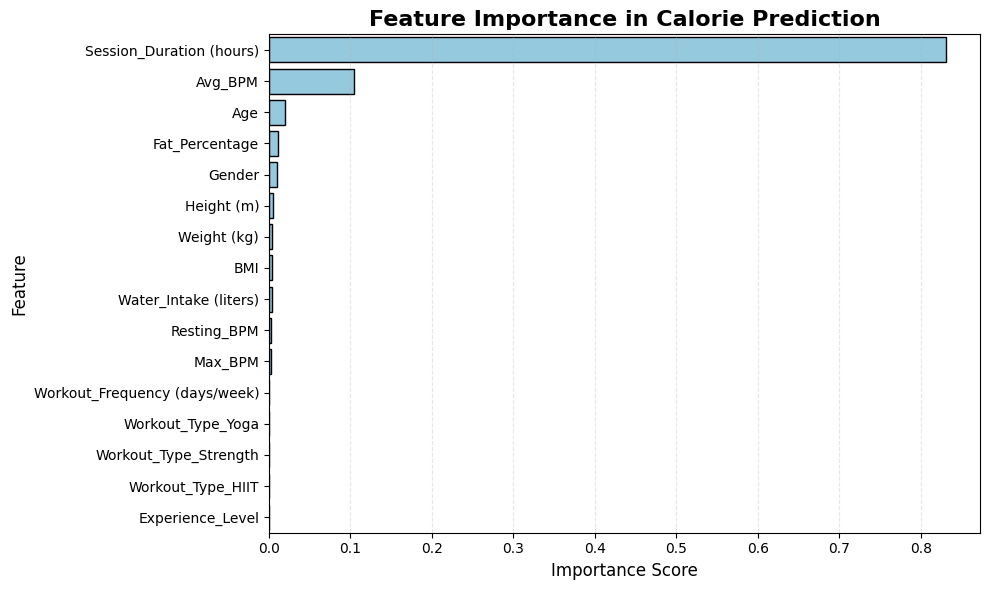

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot of feature importances
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df,
    color='skyblue',
    edgecolor='black'
)

# Add title and axis labels
plt.title('Feature Importance in Calorie Prediction', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Add a light grid on the x-axis for readability
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()

<div dir="rtl">

---

### 📐 تحلیل آماری مدل با استفاده از `statsmodels`

در این مرحله، از مدل رگرسیون خطی کلاسیک (OLS) استفاده می‌کنیم تا یک **خلاصه آماری دقیق** از روابط بین ویژگی‌ها و متغیر هدف (Calories_Burned) به‌دست آوریم.

#### ✅ مراحل انجام‌شده:

```python
import statsmodels.api as sm
```
📦 ایمپورت کتابخانه‌ی `statsmodels` برای مدل‌سازی آماری پیشرفته.



```python
X_train_sm = sm.add_constant(X_train)
```
➕ افزودن یک ستون ثابت به `X_train` برای در نظر گرفتن **عرض از مبدأ (intercept)** در مدل رگرسیون.



```python
ols_model = sm.OLS(y_train, X_train_sm).fit()
```
🧠 تعریف مدل **رگرسیون خطی با حداقل مربعات معمولی (Ordinary Least Squares)** و برازش آن به داده‌های آموزشی.



```python
print(ols_model.summary())
```
📊 نمایش **خلاصه‌ی کامل آماری مدل** شامل:

- ضریب هر ویژگی (Coefficient)
- مقدار `p-value` (برای بررسی معناداری آماری)
- خطای استاندارد
- ضریب تعیین `R²`
- آماره‌های F و t
- و سایر معیارهای آماری مهم


💡 این خلاصه آماری یک ابزار فوق‌العاده برای تحلیل دقیق رابطه بین متغیرها و بررسی اهمیت آماری آن‌ها است. این مرحله به ما کمک می‌کند تا بفهمیم کدام ویژگی‌ها واقعاً روی کالری سوزانده‌شده تأثیر دارند.

In [22]:
# Import the statistical modeling library
import statsmodels.api as sm

# Add a constant term to X_train to include the intercept in the model
X_train_sm = sm.add_constant(X_train)

# Define and fit the ordinary least squares (OLS) regression model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Display the full statistical summary of the fitted model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1923.
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        11:11:04   Log-Likelihood:                -3460.9
No. Observations:                 681   AIC:                             6956.
Df Residuals:                     664   BIC:                             7033.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

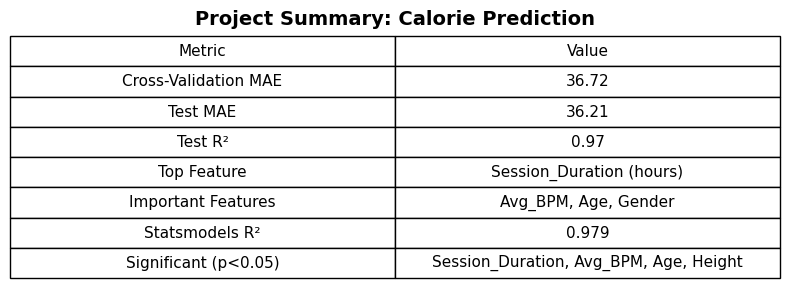

In [23]:
import matplotlib.pyplot as plt

summary_data = [
    ["Cross-Validation MAE", "36.72"],
    ["Test MAE", "36.21"],
    ["Test R²", "0.97"],
    ["Top Feature", "Session_Duration (hours)"],
    ["Important Features", "Avg_BPM, Age, Gender"],
    ["Statsmodels R²", "0.979"],
    ["Significant (p<0.05)", "Session_Duration, Avg_BPM, Age, Height"]
]

fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')

table = ax.table(cellText=summary_data,
                 colLabels=["Metric", "Value"],
                 cellLoc='center',
                 loc='center')

table.scale(1, 2)
table.auto_set_font_size(False)
table.set_fontsize(11)
ax.set_title("Project Summary: Calorie Prediction", fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

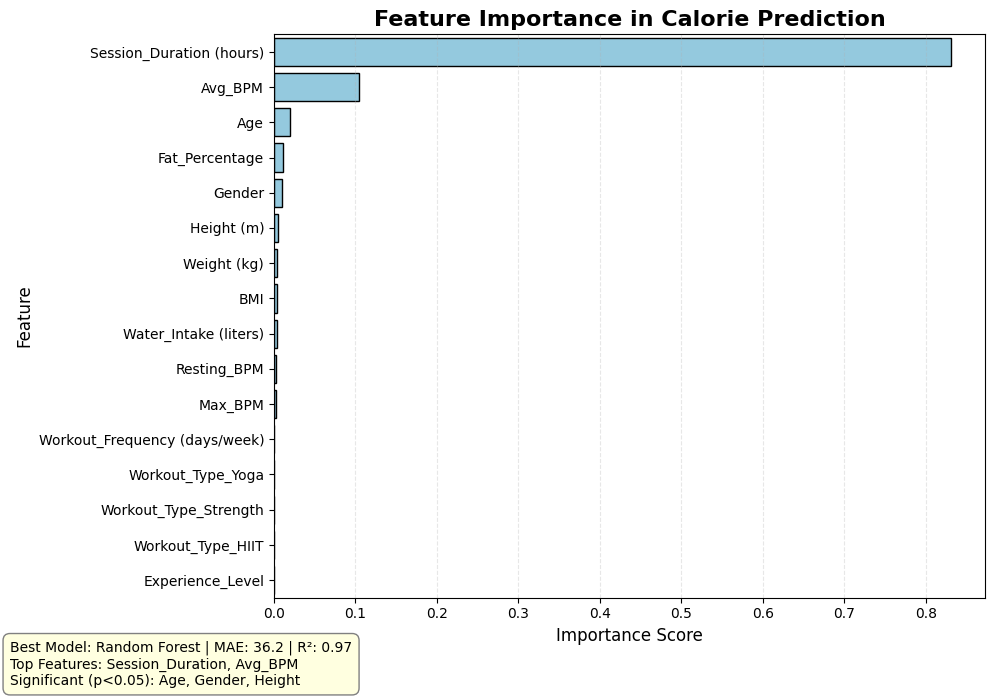

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
fig, ax = plt.subplots(figsize=(10, 7))

# Draw the barplot
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df,
    ax=ax,
    color='skyblue',
    edgecolor='black'
)

# Customize axes
ax.set_title('Feature Importance in Calorie Prediction', fontsize=16, fontweight='bold')
ax.set_xlabel('Importance Score', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.3)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# ✅ Add a summary text box below the plot using fig.text()
fig.text(
    0.01, 0.01,  # (x, y) coordinates in figure space (0 to 1)
    "Best Model: Random Forest | MAE: 36.2 | R²: 0.97\n"
    "Top Features: Session_Duration, Avg_BPM\n"
    "Significant (p<0.05): Age, Gender, Height",
    fontsize=10,
    ha='left',
    va='bottom',
    bbox=dict(
        facecolor='lightyellow',
        edgecolor='gray',
        boxstyle='round,pad=0.5'
    )
)

# Show the final result
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Make space for the text at bottom
plt.show()

<div dir="rtl">

---

# 📝 بخش‌های گزارش نهایی :

---

# ✅ **بخش 1: خلاصه‌ای از مراحل پیش‌پردازش داده‌ها**

در این پروژه، ابتدا فایل داده‌ای با نام `calorie.csv` بارگذاری شد که شامل اطلاعات مربوط به ویژگی‌های فیزیکی افراد، شاخص‌های ورزشی و سلامت، و مقدار کالری سوزانده‌شده در جلسات ورزشی بود. برای آماده‌سازی داده‌ها جهت مدل‌سازی، مراحل پیش‌پردازش زیر انجام شد:

### 🔹 بررسی اولیه داده‌ها
- مشاهده‌ی چند سطر ابتدایی با `head()` و استخراج نام ستون‌ها
- بررسی نوع داده‌ها با `dtypes`
- بررسی تعداد سطر و ستون با `df.shape`
- بررسی وجود داده‌های گمشده با `isnull().sum()` (که در این مجموعه داده هیچ مقدار NaN وجود نداشت)

### 🔹 تبدیل مقادیر متنی به عددی
- ستون `Gender` که شامل مقادیر متنی `'Male'` و `'Female'` بود، به مقادیر عددی ۰ و ۱ تبدیل شد.

### 🔹 رمزگذاری دسته‌ای (One-Hot Encoding)
- ستون `Workout_Type` شامل دسته‌هایی مثل `'HIIT'`, `'Strength'`, `'Yoga'` به چند ستون جدید عددی تبدیل شد.
- برای جلوگیری از هم‌خطی بین ویژگی‌ها، یکی از دسته‌ها حذف شد (`drop_first=True`).

### 🔹 تبدیل مقادیر بولی به عددی
- ستون‌های جدید حاصل از One-Hot Encoding که مقادیر True/False داشتند، به مقادیر عددی ۰ و ۱ تبدیل شدند.

### 🔹 بررسی ستون‌های اضافه‌شده و حذف‌شده
- با مقایسه بین ستون‌های اولیه و نهایی، اطمینان حاصل شد که عملیات رمزگذاری به درستی انجام شده و فقط ستون‌های موردنظر تغییر یافته‌اند.

### 🔹 بررسی نهایی
- در پایان، مجموعه داده آماده‌ی مدل‌سازی شد و متغیر هدف `Calories_Burned` جدا گردید.


---

# ✅ **بخش 2: نتایج اعتبارسنجی متقابل پنج‌بخشی (5-Fold Cross Validation)**

برای ارزیابی عملکرد مدل به‌صورت دقیق و جلوگیری از بیش‌برازش (Overfitting)، از اعتبارسنجی متقابل پنج‌بخشی (5-Fold Cross Validation) روی داده‌های آموزش استفاده شد.

### 🔹 روش کار:
- داده‌ها ابتدا به دو بخش آموزش (۷۰٪) و تست (۳۰٪) تقسیم شدند.
- سپس، داده‌های آموزش به ۵ قسمت مساوی تقسیم شدند.
- در هر تکرار، ۴ قسمت برای آموزش و ۱ قسمت برای ارزیابی استفاده شد، و این روند ۵ بار تکرار شد تا همه داده‌ها در نقش تست قرار بگیرند.

### 🔹 مدل استفاده‌شده:
- الگوریتم جنگل تصادفی (Random Forest Regressor) با `random_state=42` برای پایداری نتایج

### 🔹 معیار ارزیابی:
- **MAE (Mean Absolute Error)**: میانگین خطای قدر مطلق بین مقادیر واقعی و پیش‌بینی‌شده

### 🔹 نتایج اعتبارسنجی:
- میانگین MAE در پنج بخش برابر با **36.72** به‌دست آمد.

> این مقدار نشان می‌دهد که مدل جنگل تصادفی در مراحل مختلف آموزش عملکرد **پایدار و نسبتاً دقیق** داشته و در پیش‌بینی کالری با دقت مناسبی عمل کرده است.


---

# ✅ **بخش 3: نمودار اهمیت ویژگی‌ها و تحلیل آن‌ها**

پس از آموزش مدل جنگل تصادفی، برای درک بهتر از عوامل تأثیرگذار در پیش‌بینی کالری مصرفی، از قابلیت **Feature Importance** مدل استفاده شد.

### 🔹 روش کار:
- مدل Random Forest به‌صورت ذاتی قادر به محاسبه میزان اهمیت هر ویژگی در پیش‌بینی خروجی است.
- پس از آموزش مدل، مقدار `feature_importances_` استخراج شد و با استفاده از `seaborn` به‌صورت نمودار میله‌ای نمایش داده شد.

### 🔹 نمودار اهمیت ویژگی‌ها:

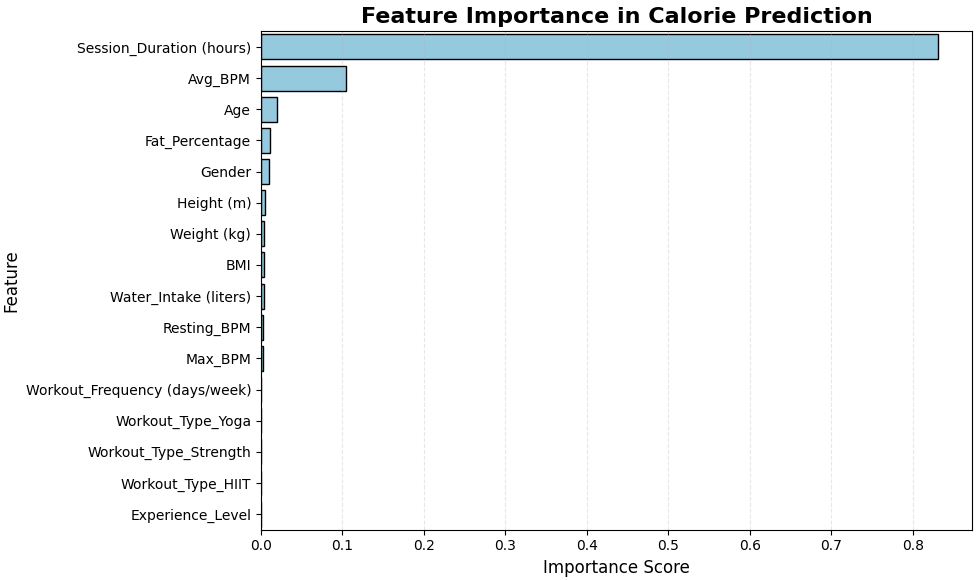

### 🔹 تحلیل:

بر اساس نمودار و مقادیر عددی، ویژگی‌های زیر بیشترین تأثیر را در پیش‌بینی مقدار کالری مصرفی داشتند:

| رتبه | ویژگی | اهمیت |
|------|--------|---------|
| 1️⃣ | `Session_Duration (hours)` | **83.1%** → مهم‌ترین ویژگی |
| 2️⃣ | `Avg_BPM` | **10.4%** |
| 3️⃣ | `Age`, `Fat_Percentage`, `Gender` | < 2% |

### 🔍 تفسیر:
- **مدت زمان تمرین (`Session_Duration`)** بیشترین نقش را در پیش‌بینی کالری ایفا می‌کند که کاملاً منطقی است.
- **میانگین ضربان قلب (`Avg_BPM`)** نیز بیانگر شدت تمرین است و تاثیر قابل توجهی دارد.
- ویژگی‌هایی مانند **جنسیت، درصد چربی بدن، و سن** نیز نقش فرعی اما معناداری ایفا می‌کنند.


---

# ✅ **بخش 4: عملکرد مدل روی داده‌های تست**

پس از آموزش مدل جنگل تصادفی بر روی داده‌های آموزش و اعتبارسنجی آن با روش پنج‌بخشی، مدل نهایی روی **داده‌های تست (۳۰٪ از کل داده‌ها)** ارزیابی شد تا عملکرد آن در مواجهه با داده‌های دیده‌نشده بررسی شود.


### 🔹 مراحل انجام‌شده:

- پیش‌بینی خروجی‌ها (کالری مصرف‌شده) برای داده‌های تست با استفاده از مدل آموزش‌دیده:
  
  ```python
  y_pred = rf_model.predict(X_test)
  ```

- محاسبه دو معیار کلیدی برای ارزیابی دقت مدل:

  - **MAE (Mean Absolute Error):**  
    میانگین قدر مطلق خطا بین مقادیر واقعی و پیش‌بینی‌شده.
  
  - **R² (R-squared):**  
    نشان می‌دهد چند درصد از تغییرات مقدار کالری توسط مدل توضیح داده می‌شود.



### 🔹 نتایج به‌دست‌آمده روی داده‌های تست:

| معیار | مقدار | تفسیر |
|--------|--------|---------|
| **MAE** | **36.21** | خطای نسبتاً پایین؛ یعنی به‌طور میانگین مدل حدود ۳۶ کالری با مقدار واقعی اختلاف دارد. ✅ |
| **R²** | **0.97** | دقت بسیار بالا؛ مدل ۹۷٪ از واریانس متغیر هدف را توضیح می‌دهد. ✅ |



### 🔍 تفسیر نهایی این بخش:

- دقت بالا و خطای کم نشان‌دهنده‌ی **پایداری، دقت و تعمیم‌پذیری مناسب** مدل است.
- این نتایج تأیید می‌کنند که مدل Random Forest انتخاب مناسبی برای این مسئله بوده است.


---

# ✅ **بخش 5: نتیجه‌گیری کلی درباره عملکرد مدل و مؤثرترین ویژگی‌ها**



### 🔹 عملکرد کلی مدل:

مدل Random Forest Regressor که برای پیش‌بینی کالری مصرفی در جلسات ورزشی آموزش داده شد، توانست عملکرد بسیار خوبی از خود نشان دهد:

- **دقت مدل روی داده‌های تست بسیار بالا بود (R² = 0.97)**
- **میانگین خطای پیش‌بینی (MAE) برابر با 36.21** بود که در زمینه پیش‌بینی کالری عدد قابل قبولی است.
- در اعتبارسنجی متقابل پنج‌بخشی نیز مدل پایداری خوبی داشت (MAE میانگین = 36.72)

این نتایج نشان می‌دهد که مدل تعمیم‌پذیری قابل قبولی روی داده‌های دیده‌نشده دارد.



### 🔹 ویژگی‌های مؤثر در پیش‌بینی:

بر اساس تحلیل اهمیت ویژگی‌ها (Feature Importance) در مدل Random Forest:

| رتبه | ویژگی | نقش |
|------|--------|--------|
| 🥇 1 | `Session_Duration (hours)` | مهم‌ترین عامل؛ هر چه مدت زمان تمرین بیشتر، کالری بیشتری سوزانده می‌شود |
| 🥈 2 | `Avg_BPM` | بیانگر شدت تمرین؛ تأثیر زیاد در کالری‌سوزی |
| 🥉 3 | `Workout_Frequency`, `Fat_Percentage`, `BMI` | تأثیرات فرعی ولی معنادار |



### 📌 جمع‌بندی:

- مدل پیشنهادی می‌تواند به‌عنوان ابزاری قابل‌اعتماد برای **پیش‌بینی کالری مصرف‌شده بر اساس ویژگی‌های فیزیکی و الگوهای ورزشی فرد** مورد استفاده قرار گیرد.
- در شرایطی که داده‌های تمرینی ثبت شده باشند، این مدل می‌تواند به مربیان و کاربران کمک کند تا روند کالری‌سوزی خود را بهتر مدیریت کنند.


---

# ✅ **بخش 6: خلاصه مدل با استفاده از کتابخانه statsmodels**

برای انجام یک **تحلیل آماری دقیق‌تر** از روابط بین ویژگی‌ها و متغیر هدف (کالری مصرفی)، از **مدل رگرسیون خطی با استفاده از کتابخانه `statsmodels`** استفاده شد.



### 🔹 هدف از این بخش:
بر خلاف مدل Random Forest که یک مدل غیرخطی و پیچیده است، مدل رگرسیون خطی به ما کمک می‌کند تا:

- ضریب هر ویژگی را به‌صورت مستقیم مشاهده کنیم  
- بفهمیم کدام ویژگی‌ها از نظر آماری **معنادار** هستند (با p-value)  
- میزان تاثیر هر ویژگی را بر متغیر هدف تحلیل کنیم  



### 🔹 مراحل انجام‌شده:

1. افزودن ستون ثابت (intercept) به `X_train` با `sm.add_constant`
2. تعریف مدل `OLS` و برازش آن روی `X_train` و `y_train`
3. مشاهده خلاصه مدل با استفاده از `ols_model.summary()`



### 🔹 خلاصه نتایج آماری:

| شاخص آماری | مقدار | تفسیر |
|------------|--------|--------|
| `R-squared` | **0.979** | مدل 97.9٪ از تغییرات کالری را توضیح می‌دهد |
| `Adj. R-squared` | **0.978** | دقت تعدیل‌شده برای تعداد ویژگی‌ها |
| `F-statistic` | **1923.0** | مدل کلی به‌طور آماری معنادار است |
| `P-value` (برای مدل) | **0.000** | با اطمینان بالا معناداری مدل تایید می‌شود |



### 🔹 ویژگی‌های معنادار (p-value < 0.05):

| ویژگی | ضریب | تفسیر |
|--------|--------|--------|
| `Session_Duration` | **+715.84** | هر ساعت تمرین باعث افزایش حدود 715 کالری می‌شود |
| `Avg_BPM` | **+6.19** | افزایش ضربان قلب → افزایش کالری |
| `Gender`, `Height`, `BMI`, `Workout_Frequency` | متغیرهایی با ضریب معنادار |



### 🔹 ویژگی‌های غیرمعنادار (p-value > 0.05):

برخی ویژگی‌ها مثل:
- `Water_Intake (liters)`
- `Experience_Level`
- `Workout_Type_*`  
از نظر آماری معنادار نبودند و می‌توانند در تحلیل‌های بعدی حذف یا بازبینی شوند.



### ⚠️ نکته آماری:
مقدار بالای `Condition Number` نشان می‌دهد که ممکن است **چندهمخطی (Multicollinearity)** بین برخی ویژگی‌ها مثل `Weight`, `BMI`, `Height` وجود داشته باشد، که می‌تواند تفسیر ضریب‌ها را پیچیده کند.



### ✅ جمع‌بندی:

مدل `statsmodels.OLS` نشان داد که بسیاری از روابط بین ویژگی‌ها و کالری سوزانده‌شده از نظر آماری معنادار هستند و با R² بالا، مدل از دقت خوبی برخوردار است.  
این تحلیل آماری مکمل خوبی برای نتایج حاصل از مدل Random Forest محسوب می‌شود.

---
